## Question 1

### Linear SVM for Two-class Problem

Use the ‘q1_classA.csv’ and ‘q1_classB.csv’ for this question. In this part, you try different values of the C parameter of SVM. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. Use the whole set for training purposes.

1. Load data of two classes and plot to visualizing the dataset on the same figure.

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

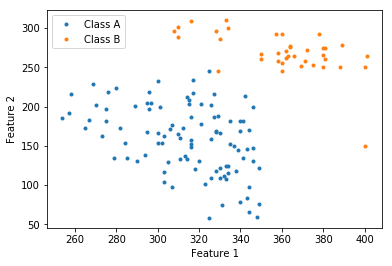

In [21]:
data_a = pd.read_csv("Data/q1_classA.csv", sep=',', encoding='ISO-8859-1', header=None)
data_b = pd.read_csv("Data/q1_classB.csv", sep=',', encoding='ISO-8859-1', header=None)

data_b['label'] = 'B'
data_a['label'] = 'A'

data_a=data_a.values
data_b=data_b.values

plt.figure()
plt.plot(data_a[:,0],data_a[:,1],'.', label='Class A')
plt.plot(data_b[:,0],data_b[:,1],'.', label='Class B')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

2. Train a linear SVM on the dataset. Try to use different values of C and see how the decision boundary varies. Use C={0.001, 0.01, 0.1, 1}.

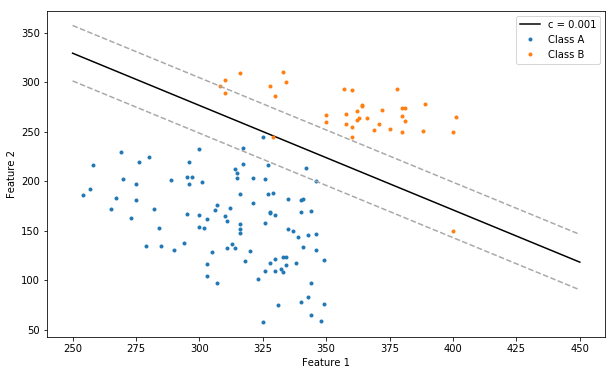

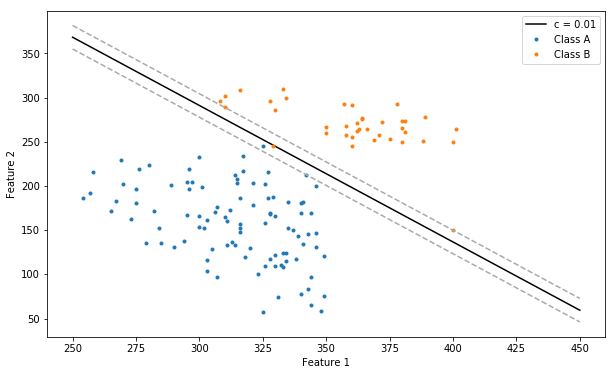

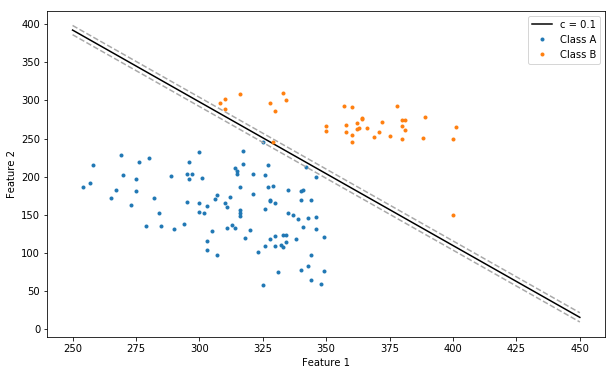

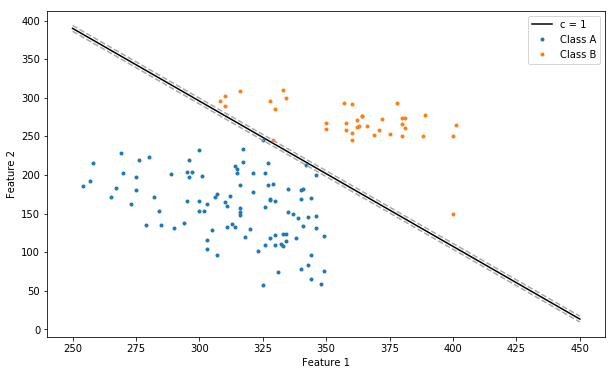

In [22]:
data = np.append(data_a ,data_b, axis = 0)

c= [0.001,0.01,0.1,1]

for ele in c:
    clf = svm.SVC(kernel='linear',C=ele)
    clf.fit(data[:,:2], data[:,2])
    
    plt.figure(figsize=(10,6))
    k = clf.coef_[0]
    j = -k[0] / k[1]
    x1 = np.linspace(250, 450)
    y1 = j * x1 - (clf.intercept_[0]) / k[1]
    m = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_2 = y1 - np.sqrt(1 + j ** 2) * m
    yy_3 = y1 + np.sqrt(1 + j ** 2) * m
    plt.plot(x1,y1,'#000000', label='c = '+str(ele))
    plt.plot(data_a[:,0],data_a[:,1],'.', label='Class A')
    plt.plot(data_b[:,0],data_b[:,1],'.', label='Class B')
    plt.plot(x1,yy_2,'#A9A9A9',linestyle="--")
    plt.plot(x1,yy_3,'#A9A9A9',linestyle="--")
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.plot()

3. Plot different decision boundaries with different C and compare them beside each other on one figure in your report.

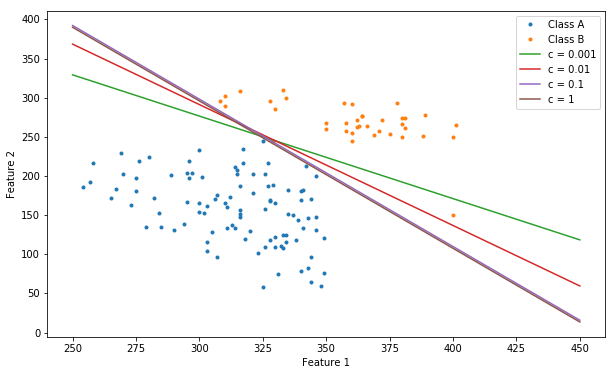

In [23]:
data = np.append(data_a ,data_b, axis = 0)

c= [0.001,0.01,0.1,1]

plt.figure(figsize=(10,6))
plt.plot(data_a[:,0],data_a[:,1],'.', label='Class A')
plt.plot(data_b[:,0],data_b[:,1],'.', label='Class B')
for ele in c:
    clf = svm.SVC(kernel='linear',C=ele)
    clf.fit(data[:,:2], data[:,2])
    
    j = clf.coef_[0]
    k = -j[0] / j[1]
    x1 = np.linspace(250, 450)
    y1 = k * x1 - (clf.intercept_[0]) / j[1]
    plt.plot(x1,y1, label='c = '+str(ele))    
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.plot()

4. Which value of C is the best value for this dataset? Explain the effect of C in training of SVM.

## Question 2

### Adaboost

In this part you will create an adaboost classifier based on linear SVM to classify the dataset in Question 2.

1. Load and plot ‘classA.csv’ and ‘classB.csv’ and visualize them on the same figure.

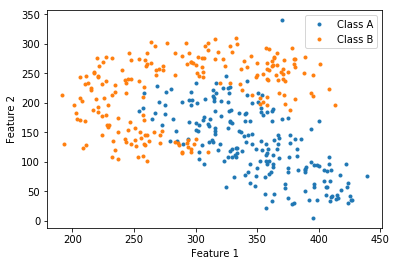

In [24]:
data_a = pd.read_csv("Data/classA.csv", sep=',', encoding='ISO-8859-1', header=None)
data_b = pd.read_csv("Data/classB.csv", sep=',', encoding='ISO-8859-1', header=None)

data_b['label'] = 'B'
data_a['label'] = 'A'

data_a=data_a.values
data_b=data_b.values

plt.figure()
plt.plot(data_a[:,0],data_a[:,1],'.', label='Class A')
plt.plot(data_b[:,0],data_b[:,1],'.', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

2. Train a linear SVM with proper C value from the set {0.1, 1 , 10 , 100} and visualize the decision boundary and report the accuracy based on 10-times-10-fold cross validation.

In [25]:
def train_test_k_fold_split(df, fold):
    indices = df.index.tolist()
    low = int((fold/10)*len(indices))
    high = int(((fold+1)/10)*len(indices))
    test_indices=indices[low:high]
    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    return train_df, test_df

For C : 0.1  Mean Accuracy : 0.7980243902439024  Variance : 0.003278027364663891
For C : 1  Mean Accuracy : 0.7970426829268292  Variance : 0.0034747797070196302
For C : 10  Mean Accuracy : 0.7949817073170732  Variance : 0.003919637529744199
For C : 100  Mean Accuracy : 0.7965304878048779  Variance : 0.003188746988399763


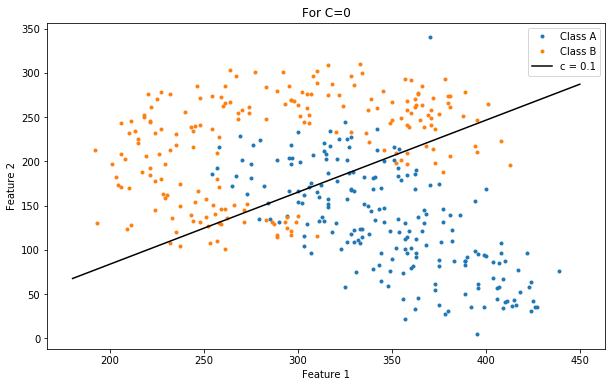

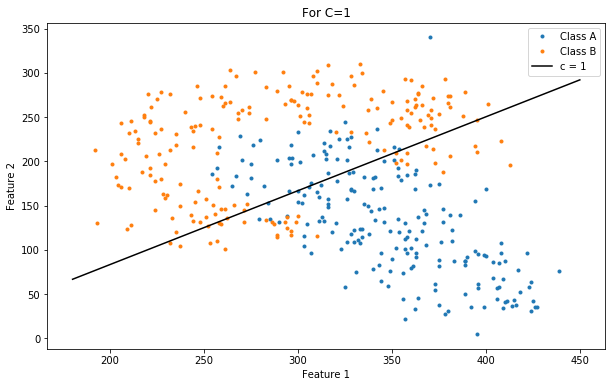

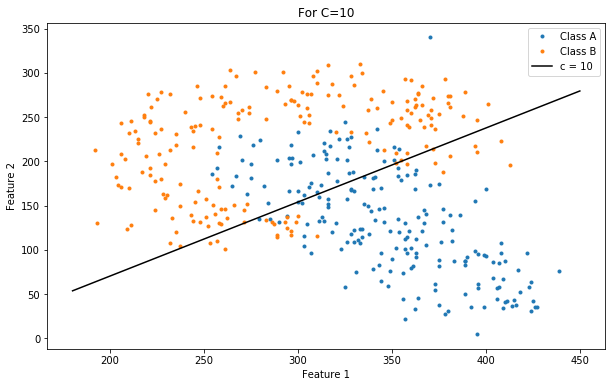

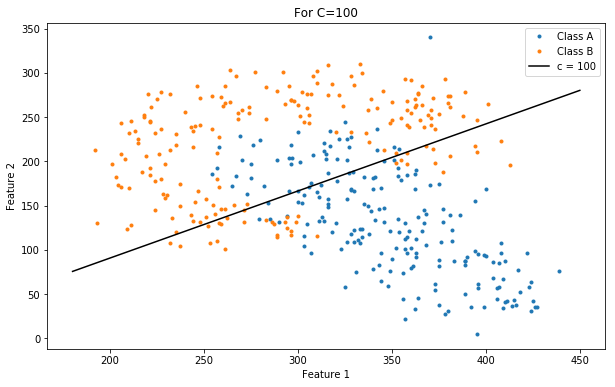

In [30]:
data = np.append(data_a ,data_b, axis = 0)
C = [0.1,1,10,100]
for c in C:
    accuracy = []
    for _ in range(10):
        data = pd.DataFrame(data)
        data = data.sample(frac=1)
        for i in range(10):
            train_df, test_df = train_test_k_fold_split(pd.DataFrame(data), i)
            clf = svm.SVC(kernel='linear',C=c)
            train_df = train_df.values
            test_df = test_df.values
            clf.fit(train_df[:,:2], train_df[:,2])
            accuracy.append(accuracy_score(test_df[:,2],clf.predict(test_df[:,:2])))
    print("For C :" ,c ," Mean Accuracy :" ,np.mean(accuracy) ," Variance :" ,np.var(accuracy))
    
    plt.figure(figsize=(10,6))
    k = clf.coef_[0]
    j = -k[0] / k[1]
    x1 = np.linspace(250, 450)
    y1 = j * x1 - (clf.intercept_[0]) / k[1]
    m = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_2 = y1 - np.sqrt(1 + j ** 2) * m
    yy_3 = y1 + np.sqrt(1 + j ** 2) * m
    plt.plot(x1,y1,'#000000', label='c = '+str(c))
    plt.plot(data_a[:,0],data_a[:,1],'.', label='Class A')
    plt.plot(data_b[:,0],data_b[:,1],'.', label='Class B')
    plt.plot(x1,yy_2,'#A9A9A9',linestyle="--")
    plt.plot(x1,yy_3,'#A9A9A9',linestyle="--")
    plt.title("For C=%i"%c)
    plt.legend()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.plot()

3. Create an ensemble of classifiers based on Adaboost-M1 approach to classify the dataset again. Use a linear SVM with the selected C in part 2 as your weak learner classifier. Use T = 50 as the max number of weak learners.

Note:

I) For each iteration draw only 100 samples from the dataset to train each classifier.

II) If the training error is higher than 50% in one iteration, discard the classifier and re-sample the training set and train a new classifier. Continue until you have trained 50 unique SVMs.

In [7]:
def my_adaboost(train_df, test_df, c):
    
    train_data = train_df.values
    classifier_array = []
    log_beta_array = []
    weights_array = np.full((len(train_data)), 1/len(train_data))

    while len(classifier_array)<50:

        random_indicies = np.random.choice(len(train_data), 100, replace=False)

        train_data_100 = train_data[random_indicies,:]
        weights_100 = weights_array[random_indicies]
        train_data_remaining = np.delete(train_data, random_indicies, axis=0)

        clf = svm.SVC(kernel='linear',C=c)
        clf.fit(train_data_100[:,:2], train_data_100[:,2], sample_weight=weights_100)

        training_error = 0

        prediction = clf.predict(train_data[:,0:2])

        for i in range(len(prediction)):
            if prediction[i] != train_data[i][2]:
                training_error+=weights_array[i]

        if training_error < 0.5:
            classifier_array.append(clf)       
            beta = training_error/(1-training_error)
            log_beta= np.log(1/beta)
            log_beta_array.append(log_beta)

            for i in range(len(prediction)):
                if prediction[i] == train_data[i][2]:
                    weights_array[i]*=beta

            sum_weights = np.sum(weights_array)
            weights_array = weights_array/sum_weights


    # Classifying Test Set
    correct = 0
    for test_sample in test_df.values:
        var_A = 0
        var_B = 0
        for i in range(len(classifier_array)):
            predict = classifier_array[i].predict([test_sample[:2]])
            if predict == 'A':
                var_A+=log_beta_array[i]
            elif predict == 'B':
                var_B+=log_beta_array[i]

        if var_A>var_B and test_sample[2] is 'A':
            correct+=1
        elif var_B>var_A and test_sample[2] is 'B':
            correct+=1  

    return correct/len(test_df), classifier_array, log_beta_array

In [8]:
data = np.append(data_a ,data_b, axis = 0)
data = pd.DataFrame(data)

data = data.sample(frac=1)
train_df, test_df = train_test_k_fold_split(data, 0)

C = [0.1,1,10,100]
for c in C:
    accuracy,_,_ = my_adaboost(train_df,test_df, c)
    print("For C :" ,c ,'Accuracy :',accuracy)

For C : 0.1 Accuracy : 0.95
For C : 1 Accuracy : 0.95
For C : 10 Accuracy : 0.9
For C : 100 Accuracy : 0.925


4. Report the mean and variance of accuracy for 10-times-10-fold cross validation approach.

In [10]:
data = np.append(data_a ,data_b, axis = 0)
max_acc = 0

classifiers = []
log_betas = []
C = [0.1,1,10,100]
for c in C:
    accuracy = []
    for _ in range(10):
        data = pd.DataFrame(data)
        data = data.sample(frac=1)
        for i in range(10):
            train_df, test_df = train_test_k_fold_split(data, i)
            acc, c_a, l_b_a = my_adaboost(train_df,test_df, c)
            accuracy.append(acc)
            if acc>max_acc:
                max_acc = acc
                classifier_array = c_a
                log_beta_array = l_b_a
            
    classifiers.append(c_a)
    log_betas.append(l_b_a)
    print("For C :" ,c ," Mean Accuracy :" ,np.mean(accuracy) ," Variance :" ,np.var(accuracy))

For C : 0.1  Mean Accuracy : 0.8907256097560976  Variance : 0.002649779112135633
For C : 1  Mean Accuracy : 0.8892926829268295  Variance : 0.0022698045806067817
For C : 10  Mean Accuracy : 0.8877804878048781  Variance : 0.0026875142772159423
For C : 100  Mean Accuracy : 0.8895182926829268  Variance : 0.0019087871430696019


5. Visualize the the decision boundary of the ensemble model on the plot in part 1.

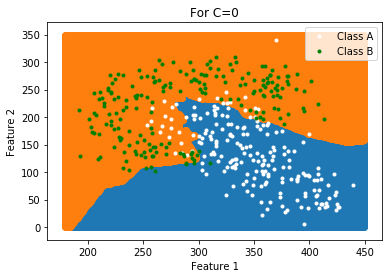

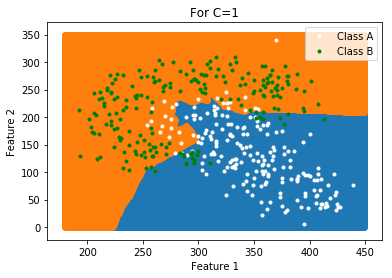

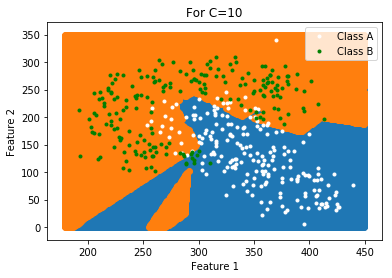

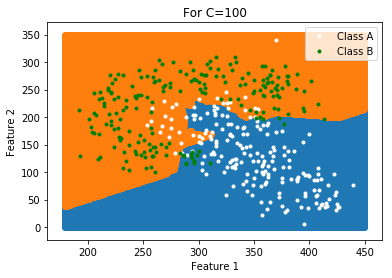

In [19]:
C = [0.1,1,10,100]
for val in range(len(C)):
    
    classifier_array = classifiers[val]
    log_beta_array = log_betas[val]
    points_A = []
    points_B = []

    X,Y = np.mgrid[180:450:1, 0:350:1]
    points=np.array([X.flatten(),Y.flatten()]).T

    for test_sample in points:
        var_A = 0
        var_B = 0
        for i in range(len(classifier_array)):
            predict = classifier_array[i].predict([test_sample])
            if predict == 'A':
                var_A+=log_beta_array[i]
            elif predict == 'B':
                var_B+=log_beta_array[i]
        if var_A>var_B:
            points_A.append(test_sample)
        elif var_B>var_A:
            points_B.append(test_sample)

    plt.figure()
    plt.plot(data_a[:,0],data_a[:,1],'w.', label='Class A')
    plt.plot(data_b[:,0],data_b[:,1],'g.', label='Class B')
    plt.scatter(np.array(points_A)[:,0],np.array(points_A)[:,1])  
    plt.scatter(np.array(points_B)[:,0],np.array(points_B)[:,1])  
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title("For C=%i"%C[val])
    plt.plot()